### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [127]:
# Import Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [128]:
# Step 1: Import the data from the "weather_data.csv" file
df = pd.read_csv('weather_classification_data.csv')

# Step 2: Display the number of rows and columns in the dataset
print(f"Rows: {df.shape[0]}")
print(f"Cols: {df.shape[1]}")

Rows: 13200
Cols: 11


In [129]:
# Step 3: Display the first few rows of the dataset to understand its structure.
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


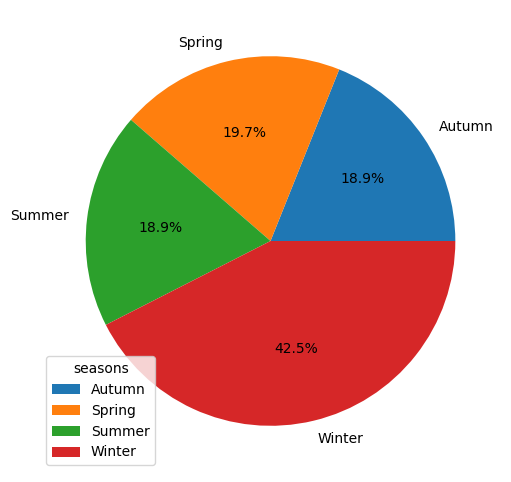

In [130]:
# Visualize season using a pie chart

plt.figure(figsize=(10,6))
data = df.groupby('season').count().iloc[:,0]
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.legend(title='seasons')
plt.show()

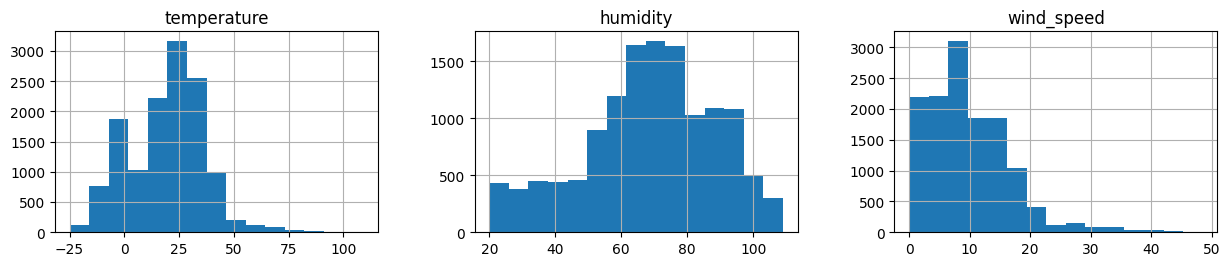

In [131]:
# Visualize temperature, humidity, and wind_speed using histograms

df[['temperature', 'humidity', 'wind_speed']].hist(bins=15, layout=(2, 3), figsize=(15, 6))
plt.show()

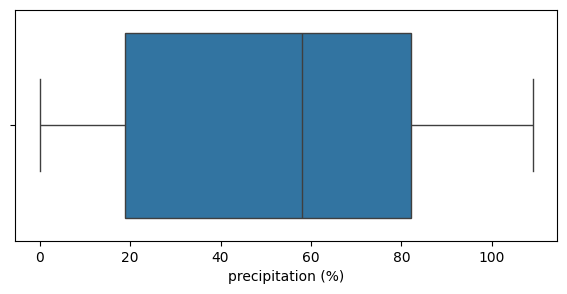

In [132]:
# Visualize precipitation (%) using a box plot

plt.figure(figsize=(7,3))
sns.boxplot(df, x='precipitation (%)')
plt.show()

### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [133]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.

df = pd.get_dummies(df, columns=['cloud_cover', 'location', 'season'], drop_first=True)

In [134]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,14,73,9.5,82,1010.82,2,3.5,Rainy,False,False,True,True,False,False,False,True
1,39,96,8.5,71,1011.43,7,10.0,Cloudy,False,False,True,True,False,True,False,False
2,30,64,7.0,16,1018.72,5,5.5,Sunny,False,False,False,False,True,True,False,False
3,38,83,1.5,82,1026.25,7,1.0,Sunny,False,False,False,False,False,True,False,False
4,27,74,17.0,66,990.67,1,2.5,Rainy,False,True,False,False,True,False,False,True


In [135]:
# Step 2: Scale the numerical features

scaler = StandardScaler()
numerical_features = ['temperature', 'humidity', 'wind_speed', 'precipitation (%)', 'atmospheric_pressure', 'uv_index', 'visibility (km)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [136]:
# Step3: Display the first few rows of the updated dataset.

df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [137]:
# Step 1: Select features and target variable
x = df.drop(columns=['weather_type'])
y = df['weather_type']

# Step 2: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [138]:
# Step 3: Train SVM with linear kernel
model = SVC(kernel='linear')
model.fit(x_train, y_train)

# Step 4: Print accuracy score

model.score(x_test, y_test)

0.8845959595959596

In [139]:
# Step 5: Evaluate the model
y_pred = model.predict(x_test)

#classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

      Cloudy       0.86      0.84      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [140]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[806  82  28  39]
 [ 49 852  67  14]
 [ 26  12 974  21]
 [ 57  29  33 871]]


### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [141]:
# Step 1: Train SVM with RBF kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)


# Step 2: Print accuracy score
score = model_rbf.score(x_test, y_test)
print(score)



# Step 3: Evaluate the model

y_pred = model_rbf.predict(x_test)

#classification report

report = classification_report(y_test, y_pred)
print(report)

#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9055555555555556
              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.94      0.94      0.94      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

[[843  64  24  24]
 [ 54 891  13  24]
 [ 30  14 968  21]
 [ 48  28  30 884]]


### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [142]:
# Step 1: Train the SVM model with specified hyperparameters
model = SVC(C=0.5, gamma='auto', kernel='rbf', degree=2)
model.fit(x_train, y_train)

# Step 2: Print the model's accuracy score
print(model.score(x_test, y_test))


# Step 3: Make predictions on the test set
y_pred = model.predict(x_test)


# Step 4: Evaluate the model using a classification report and confusion matrix


#classification report

report = classification_report(y_test, y_pred)
print(report)

#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

0.898989898989899
              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       955
       Rainy       0.90      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.93      0.88      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[833  62  36  24]
 [ 50 882  31  19]
 [ 29  10 973  21]
 [ 46  30  42 872]]


### Task 6: Implementing Sklearn Pipeline

1. Create a pipeline that includes the StandardScaler and the SVM model with an RBF kernel.
2. Train the pipeline using the training data.
3. Evaluate the pipeline using the test data and print the classification report.

In [143]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel
pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('model', SVC())
        ])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)
print(pipeline.score(x_test, y_test))


# Make predictions using the pipeline on the test data
y_pred = pipeline.predict(x_test)


#classification report

report = classification_report(y_test, y_pred)
print(report)

#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9042929292929293
              precision    recall  f1-score   support

      Cloudy       0.87      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.92      0.94      0.93      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[836  64  29  26]
 [ 47 892  22  21]
 [ 30  16 971  16]
 [ 52  27  29 882]]
